介绍了opencv中对图像的基本操作:像素操作、ROI等<br>
本质上，这些操作都是对于numpy数组的操作

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### 获取并修改某个像素

In [3]:
img = cv2.imread('./images/sai.jpeg')  
px = img[100, 100]
print("图片在（100，100）处的三通道像素值为:")
print(px)

图片在（100，100）处的三通道像素值为:
[224 240 217]


In [6]:
# 获取某点某个通道的值
img.item(100, 100,2)

217

#### 图像属性

In [7]:
# 图像大小和通道数
img.shape

(525, 700, 3)

In [8]:
# 图像总像素
img.size

1102500

In [9]:
# 图像数据类型
img.dtype

dtype('uint8')

#### 图像RIO（region of interest, 感兴趣区域）

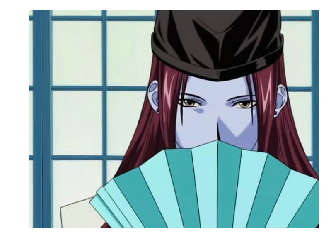

In [11]:
plt.imshow(img)
plt.axis('off')
plt.show()

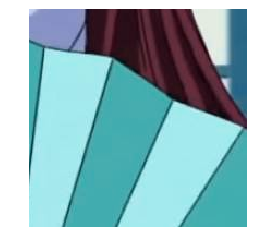

In [15]:
temp = img[300:500, 500:700, :]
plt.imshow(temp)
plt.axis('off')
plt.show()

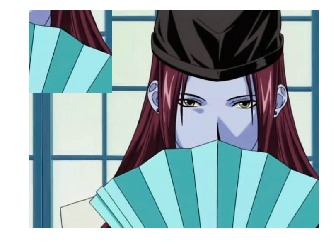

In [16]:
# 移植区域
img2 = img.copy()
img2[0:200, 0:200, :] = temp
plt.imshow(img2)
plt.axis('off')
plt.show()

#### 通道拆分

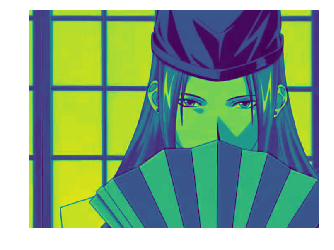

In [17]:
# opencv自带的split
g, b ,r = cv2.split(img)
plt.imshow(g)
plt.axis('off')
plt.show()

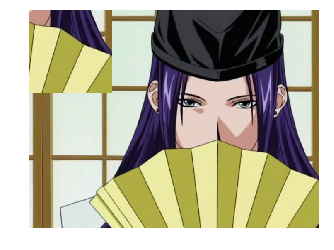

In [18]:
# 或者直接对numpy进行操作
img2[:,:,[0,2]]=img2[:,:,[2,0]]
plt.imshow(img2)
plt.axis('off')
plt.show()

#### 图像扩边（填充边界，padding）

In [19]:
BLUE=[255,0,0]
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE) 
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT) 
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101) 
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP) 
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

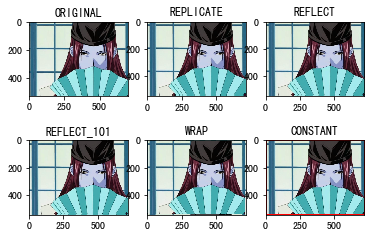

In [21]:
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL') 
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE') 
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT') 
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101') 
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP') 
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

#### 图像加法

同维图像的加法推荐使用opencv的add函数，而非直接ndaary相加

In [25]:
# numpy的加法会考虑数据类型上、下限，产生溢出
np.int8([100]) + np.int8([100])

array([-56], dtype=int8)

In [26]:
# opencv的加法是一种饱和运算， 到127截至（因为为int0， -127~127）
cv2.add(np.int8([100]),  np.int8([100]))

array([[127]], dtype=int8)

#### 图像混合

就是两张图片像素的加权和

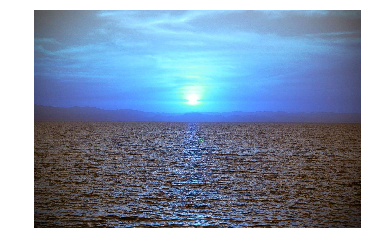

In [28]:
ocean = cv2.imread('./images/ocean.jpeg')
plt.imshow(ocean)
plt.axis('off')
plt.show()

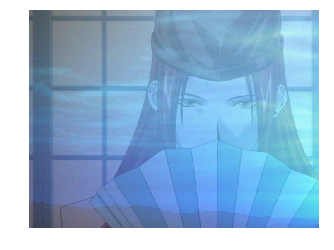

In [34]:
# 混合时两张图片必须有相同的shape
ocean_scaled = ocean[0:img.shape[0],0:img.shape[1],:]
dst = cv2.addWeighted(img, 0.2, ocean_scaled, 0.8, 0)
plt.imshow(dst)
plt.axis('off')
plt.show()

#### 位运算

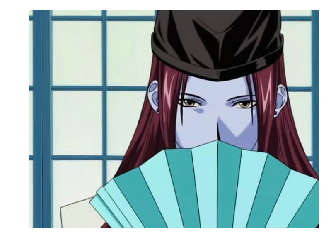

In [36]:
plt.imshow(img)
plt.axis('off')
plt.show()

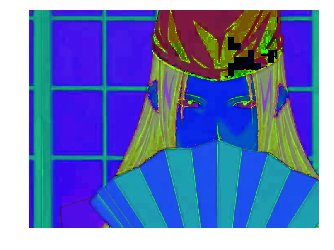

In [37]:
# 将图片变为HSV颜色空间
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)
plt.axis('off')
plt.show()

In [38]:
# 设置颜色阈值 
lower_blue=np.array([110,50,50]) 
upper_blue=np.array([130,255,255])

# 根据阈值构建掩膜
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

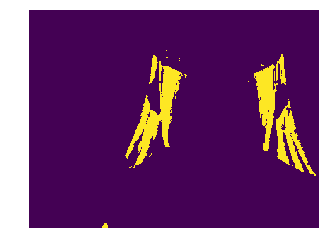

In [39]:
# 绘制掩膜
plt.imshow(mask)
plt.axis('off')
plt.show()

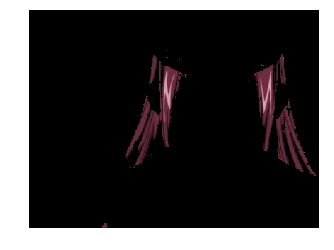

In [41]:
# 对原图像和掩膜进行位运算
des = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(des)
plt.axis('off')
plt.show()